# Genetics Algorithms for solving a 256-dimensional Quadratic Assigment Problem

## Description of the GAs tested

A description of each GA analyzed in the experiments goes here...



## Results

In [35]:
# Reading the results

import pandas as pd
import glob
import os

results_path = "gaout"

def build_dataframe(who):
    # merging the files
    joined_files = os.path.join(results_path, "*_" + who + ".csv")
    
    # A list of all joined files is returned
    joined_list = glob.glob(joined_files)
    
    # Finally, the files are joined
    df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)

    return df


df_evol = build_dataframe("evol")
df_best = build_dataframe("best")

<AxesSubplot: xlabel='FES'>

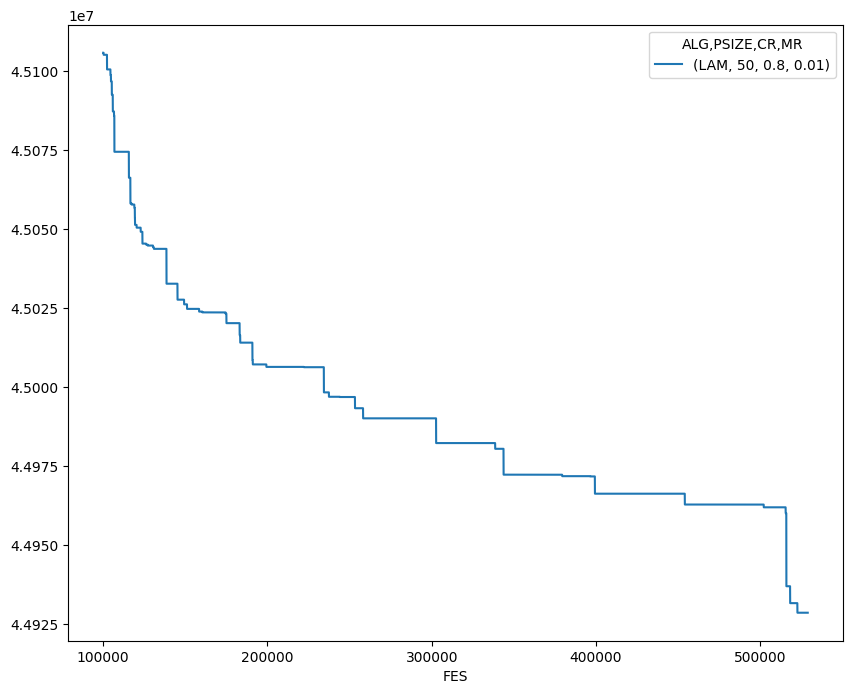

In [44]:
pd.pivot_table(df_evol[(df_evol["FES"] > 100000) & (df_evol["FES"] < 999999)].reset_index(),
               index='FES', columns=['ALG', 'PSIZE', 'CR', 'MR'], values='BFIT', aggfunc='mean'
              ).plot(subplots=False, figsize=(10,8))

In [26]:
import numpy as np
df_best.loc[:, ['ALG', 'PSIZE', 'CR', 'MR', 'BFIT']].groupby(['ALG', 'PSIZE', 'CR', 'MR']).agg([np.mean, np.std, min, max])

BFIT                                  
                          mean           std       min       max
ALG PSIZE CR  MR                                                
LAM 50    0.7 0.01  44943898.0  27871.529093  44908404  44983794

In [6]:
best_fit = df_best['BFIT'].min()

perc = max(5 - 100 * (best_fit - 44759294)/44759294, 0)

print(f"{best_fit}\tnota:{perc}")

4.783879522317756

<AxesSubplot: title={'center': 'BFIT'}, xlabel='[ALG, PSIZE, CR, MR]'>

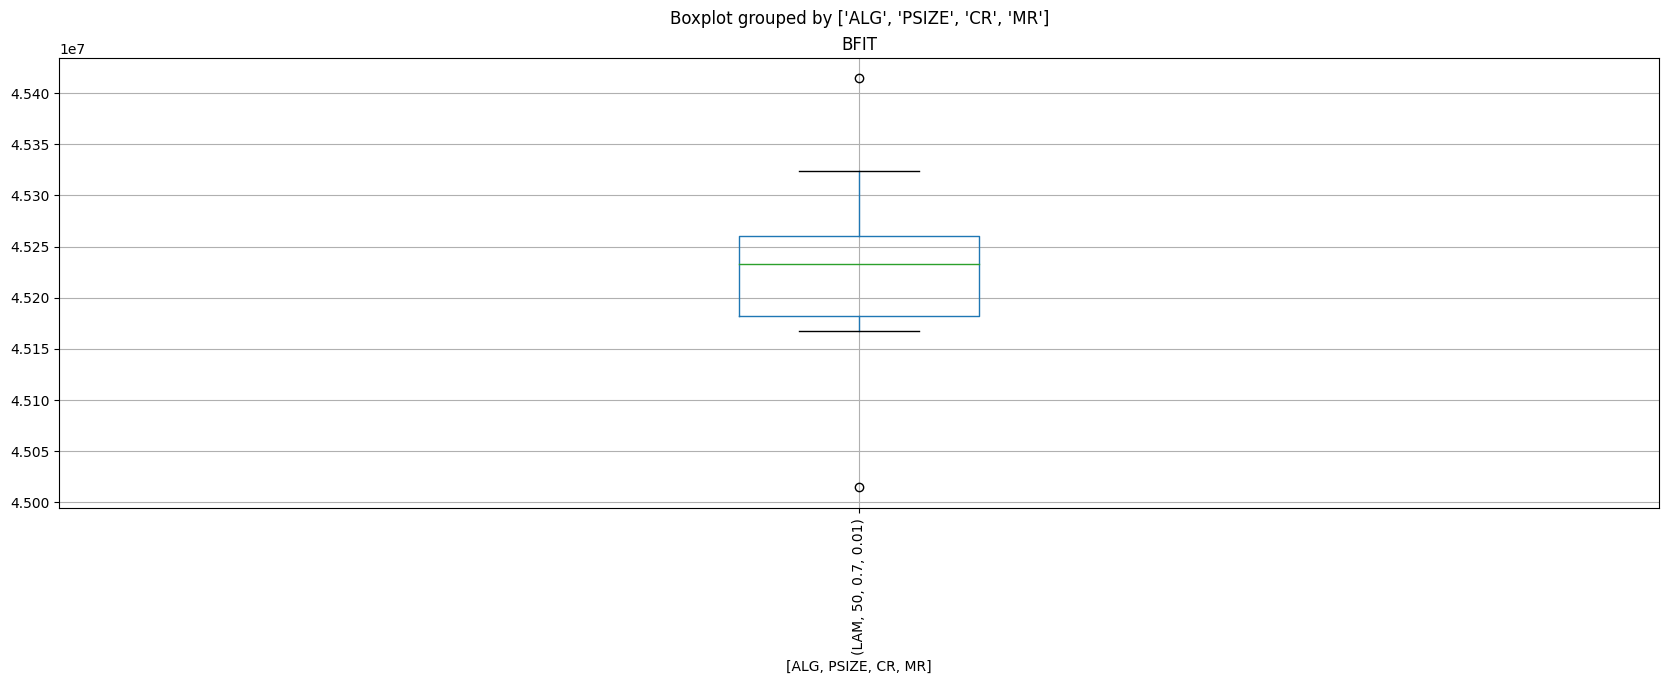

In [23]:
df_best.loc[:, ['ALG', 'PSIZE', 'CR', 'MR', 'BFIT']].boxplot(by=['ALG', 'PSIZE', 'CR', 'MR'], figsize=(20,6), rot=90)

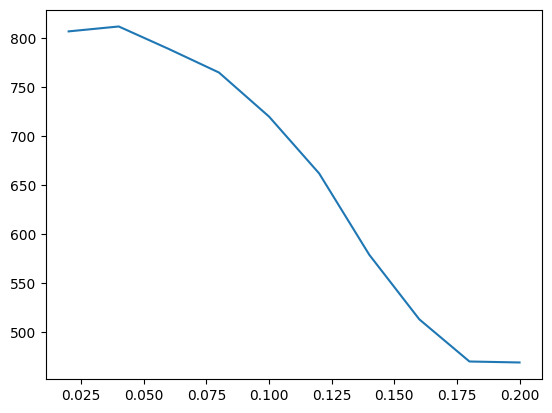

In [15]:
import gaoper as go
from qap import QAProblem
import matplotlib.pyplot as plt

qaprob = QAProblem.build_from_file("tai256c.dat")


npar = 30
nchilds = 30
perc_list = np.arange(0.00, 0.21, 0.02)[1:]
results = np.zeros((len(perc_list), 4))

iterv = 0
for per in perc_list:
    np.random.seed(98796)
    times_better = 0
    globalbest_fit = np.Inf
    for i in range(npar):
        parsol = np.random.permutation(qaprob.n)
        parfit = qaprob(parsol)
        bestsol = parsol.copy()
        bestfit = parfit
        for j in range(nchilds):
            newsol = go.max_flow_min_dist(bestsol, qaprob, rep_perc=per)
            newfit = qaprob(newsol)
            if newfit < parfit:
                times_better += 1
            
            if newfit < bestfit:
                bestsol = newsol.copy()
                bestfit = newfit
            
        if bestfit < globalbest_fit:
            globalbest_fit = bestfit

    results[iterv, :] = np.array([per, times_better, times_better/(npar*nchilds), globalbest_fit])
    iterv += 1

plt.plot(results[:,0], results[:,1])
plt.show()

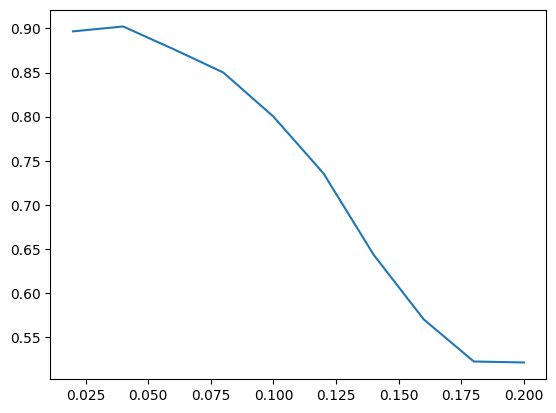

In [16]:
plt.plot(results[:,0], results[:,2])
plt.show()

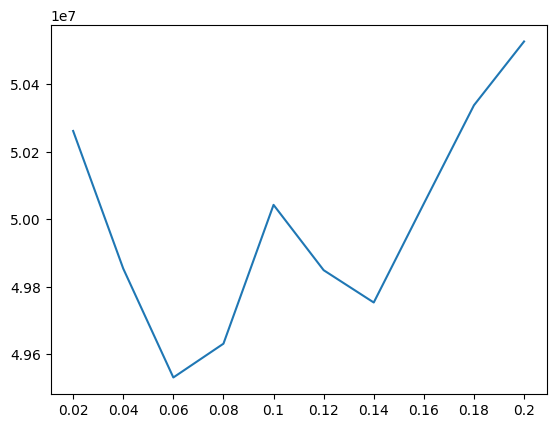

In [17]:
plt.plot([str(r) for r in results[:,0]], results[:,3])
plt.show()

In [141]:
results[:,3]

array([50418392., 49871782., 49501590., 49867826., 49594810., 50210234.,
       49440134., 49544346., 49800252.])